<a href="https://colab.research.google.com/github/troncosofranco/ML-Notebooks/blob/main/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0. Introduction

**Objective:** Create a web app able to predict the wine quality based on physicochemical properties.

**Dataset attributes**: The dataset were obtained from the [Tabular representation of wine quality dataset](https://zenodo.org/record/4090212#.Y8bcTHbMIok) reported by Karanth Manohar for red wine, and from [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv). The dataset is related to red variant of the Portuguese ‘Vinho Verde’ wine. The datasets contain 11 attributes based on physicochemical tests and one output column based on sensory data (fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates and level of alcohol). The target label is quality (score between 0 and 10). This dataset only has numeric variables:

1. **fixed acidity**: Influences the flavor of the wine. A significant reduction in acids can lead to wines that taste flat. Examples of fixed acids are tartaric, malic, citric, and succinic, which can be found in grapes (except succinic). It is measured in g/dm3.

2. **volatile acidity**: These acids must be distilled out from the wine before the end of the production process. Excess of volatile acids are undesirable and lead to unpleasant flavor. It is measured in g/dm3. citric acid: The amount of citric acid in the wine, which most of it is usually consumed during the fermentation process. It acts as a preservative and small quantities can add freshness and flavor. It is measured in g/dm3.

3. **residual sugar:** The amount of sugar remaining after the end of the fermentation. The goal is to have a perfect balance between sweetness and sourness. Wines with more than 45g/dm3 are considered sweet. It is measured in g/dm3.

4. **chlorides:** The amount of salt in the wine.

5. **free sulfur dioxide:** The amount of sulfur dioxide (SO2) in free form. They are also known as sulfites and too much of it is undesirable and gives a pungent odour. It is measured in g/dm3.

6. **total sulfur dioxide**: The total amount of SO2 in the wine. This is added to kill harmful bacteria and preserve quality and freshness. It is measured in mg/dm3.

7. **density**: It is used as a measure of the conversion of sugar to alcohol. Sweeter wines have higher density.

8. **pH**: Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic).

9. **sulphates**: The amount of mineral salts containing sulfur in the wine. It is an additive which can contribute to sulfur dioxide gas (S02) levels and acts as an antimicrobial and antioxidant. They are related to the fermentation process and affect the aroma and flavor of the wine.

10. **alcohol**: Alcohol is formed as a result of yeast converting sugar during the fermentation process. It's usually measured in % volume or alcohol by volume (ABV).

11. **quality**: A quality label in the range of 0 (very bad) to 10 (very excellent). It is the median of at least three evaluations made by wine experts.

This data contains 6,497 instances (wines) including 4,898 white wines and 1,599 red wines.


#1. Import modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from IPython.display import display, HTML
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from pandas import Series, DataFrame
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
np.random.seed(500)

#2. Load data

In [ ]:
red_df = pd.read_csv('wine_quality_red.csv')
white_df = pd.read_csv('wine_quality_white.csv', sep=';')

In [ ]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Concatenate datasets.

In [ ]:
red_df['type'] = 'red'
white_df['type'] = 'white'
df = pd.concat([red_df, white_df])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


Shuffle data

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.190,0.30,12.8,0.053,48.5,229.0,0.99860,3.14,0.49,9.1,7,white
1,7.1,0.590,0.00,2.1,0.091,9.0,14.0,0.99488,3.42,0.55,11.5,7,red
2,5.7,0.290,0.16,7.9,0.044,48.0,197.0,0.99512,3.21,0.36,9.4,5,white
3,6.1,0.105,0.31,1.3,0.037,55.0,145.0,0.99120,3.41,0.41,11.1,7,white
4,6.2,0.350,0.29,7.3,0.044,56.0,244.0,0.99560,3.36,0.55,10.0,6,white


#3. Explore data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Analize target label: Quality

Text(0.5, 0, 'Quality Index')

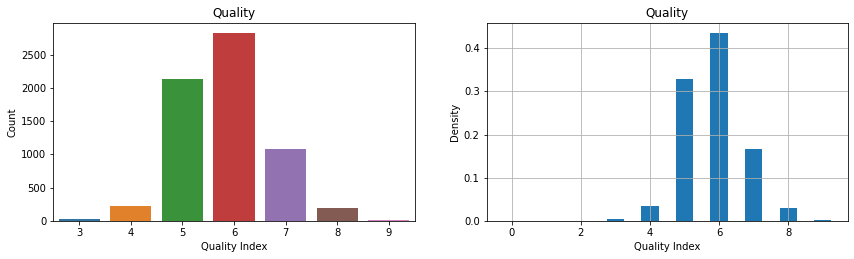

In [ ]:
fig = plt.figure(figsize=(22,8)) 
plt.subplot2grid((2,3),(0,0))
sns.countplot(df['quality'])
plt.title("Quality"); plt.ylabel("Count"); plt.xlabel("Quality Index")

plt.subplot2grid((2,3),(0,1))
df['quality'].hist(bins=np.arange(11)-0.5, rwidth=0.5, density=True)
plt.title("Quality"); plt.ylabel("Density"); plt.xlabel("Quality Index")

**Observation**: The quality index shows a normal distribution. Index = 6 represents the majority of votes. Target label exhibits lef skewness according to density figure.

In [ ]:
list(df)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'type']

Univariate analysis on continuous variables

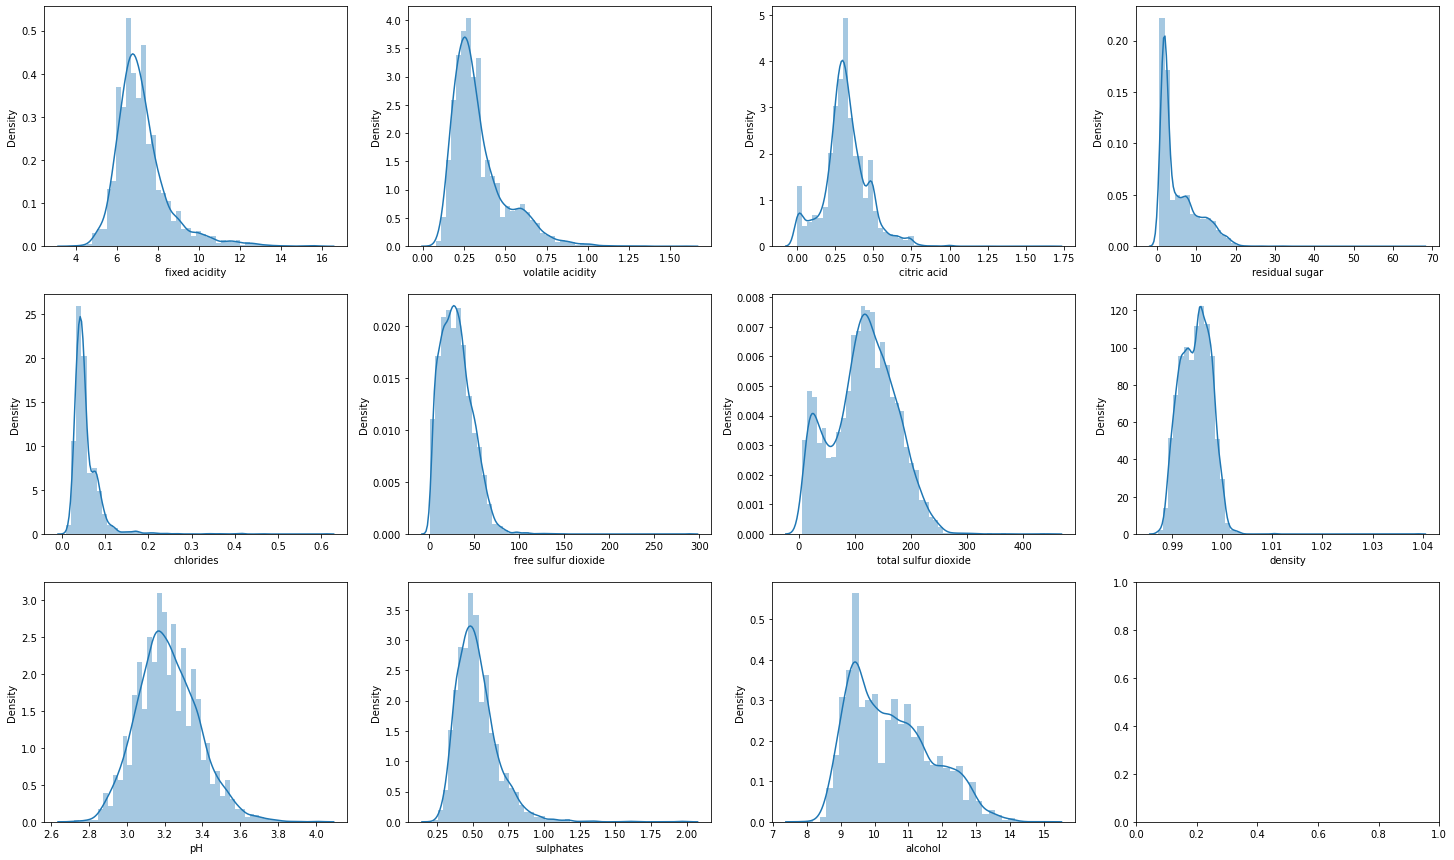

In [ ]:
fig, axs = plt.subplots(3, 4, figsize=(25, 15))
continuous_features = list(df.columns)
continuous_features.remove('quality')
continuous_features.remove('type')
axs = axs.ravel()

for ax, colname in zip(axs, continuous_features):
    sns.distplot(df[colname], ax=ax)
    


**Observation:** All the features show skewness, especially wine density and residual sugar. Ph feature presents an approximate normal distribution.

Explore how the wine quality is influenced by pH and alcohol.

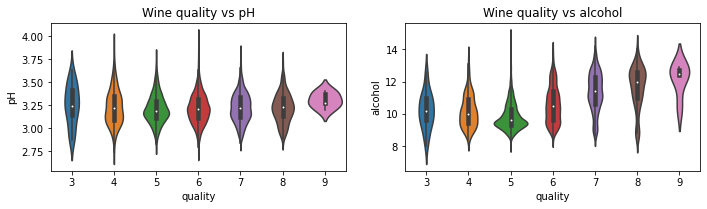

In [ ]:
fig = plt.figure(figsize=(18,6)) 
plt.subplot2grid((2,3),(0,0))
sns.violinplot(x='quality', y='pH', data=df)
plt.title("Wine quality vs pH");

plt.subplot2grid((2,3),(0,1))
sns.violinplot(x='quality', y='alcohol', data=df)
plt.title("Wine quality vs alcohol");

**Observation:** The best wines show a narrow range of pH (3.1-3.5), and a broad range of alcohol (9-14). On the other hand, wines of bad quality exhibit a broad range of values for both variables.

Compare the quality for both wine types.

Text(0.5, 0, 'Type of wine')

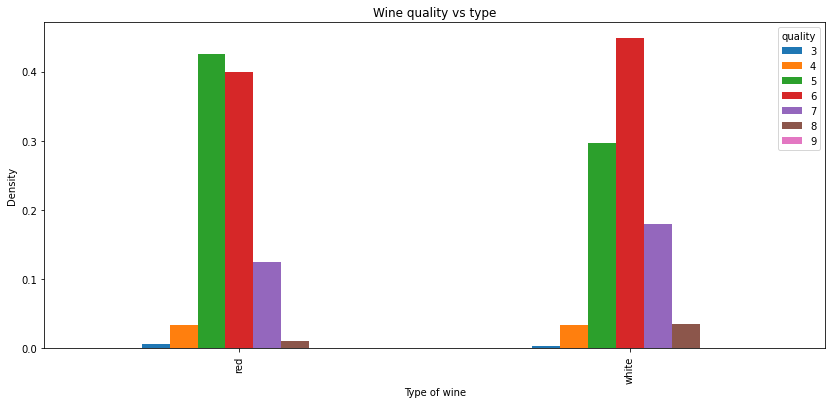

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
type_quality = pd.crosstab(df['type'], df['quality'])
type_quality.div(type_quality.sum(axis=1), axis=0).plot.bar(ax=ax)
plt.title("Wine quality vs type"); plt.ylabel("Density"); plt.xlabel("Type of wine")

**Observation:** The majority of red wine have an index quality equal to five, followed by six. On the other side, white type wine shows a majority of quality indexes equal to six.

Plot the correlation of features with wine quality.

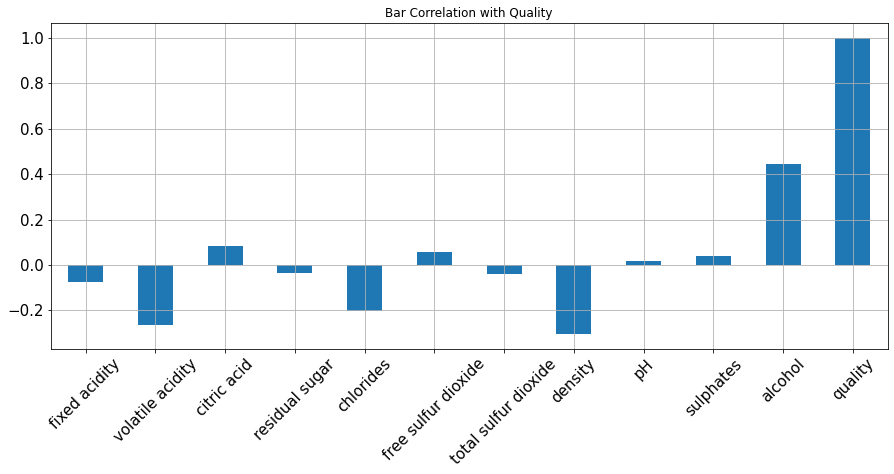

In [ ]:
df.corrwith(df['quality']).plot.bar(figsize = (15, 6), title = "Bar Correlation with Quality", fontsize = 15, rot = 45, grid = True)



**Observation:** alcohol, density, chlorides and volatile acidity are the most correlated features according to Pearson correlation coefficients. Fixed acidity, citric acid, residual sugar, free sulfur dioxide, total sulfur dioxide, pH and sulphates show a correlation coefficient lower than 0.1.

#4. Model with Gradient Boosting Classifiers

 In some cases, features with low correlation coefficient can 
confuse the model, and by removing them you not only improve the score but make the model run faster. The target label (quality) is imbalanced. Quality classes 3, 4, 5 will now belong 
to group 3, quality 6 will stay with 6, and quality classes 7, 8, 9 will belong to class 9.

In [ ]:
df.loc[df['quality'].isin([3,4,5]), 'quality'] = 3
df.loc[df['quality'].isin([4,5,6]), 'quality'] = 6
df.loc[df['quality'].isin([7,8,9]), 'quality'] = 9

Plot balanced quality data.

Text(0.5, 0, 'Type of wine')

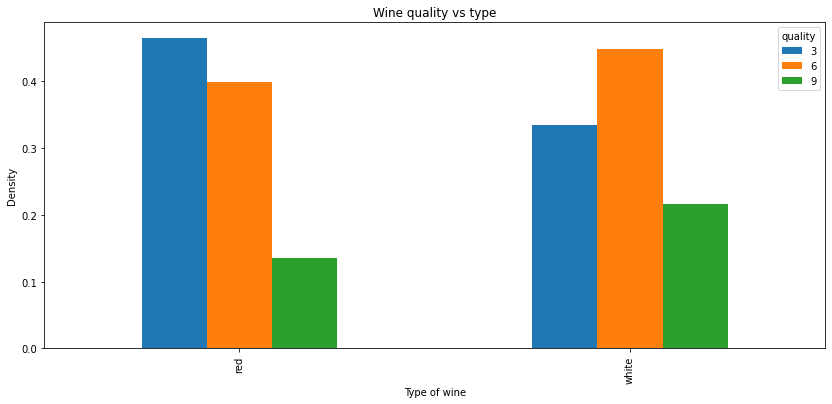

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
type_quality = pd.crosstab(df['type'], df['quality'])
type_quality.div(type_quality.sum(axis=1), axis=0).plot.bar(ax=ax)
plt.title("Wine quality vs type"); plt.ylabel("Density"); plt.xlabel("Type of wine")

Gradient Boosting Classifier is is a powerful tree-based boosted model able to process imbalanced data. It creates groups of trees and optimizes them according to their predictive strengths.

In [ ]:
df.loc[df['type']=='white', 'type'] = 0
df.loc[df['type']=='red', 'type'] = 1

In [ ]:
# Create list of features without quality and type
features = [ft for ft in list(df) if ft not in ['quality']]

from sklearn.model_selection import train_test_split

# Define quality as categorical feature
df['quality'] = pd.Categorical(df['quality'])

# Define categorical values for quality: 0, 1, 2
df['quality_class'] = df['quality'].cat.codes

outcome = 'quality_class'

# Number of categories
outcome_buckets = len(set(df['quality_class']))

# Split data
print(set(df['quality_class']))
X_train, X_test, y_train, y_test = train_test_split(df[features],
                        df[outcome], test_size=0.2, random_state=1)
print(("len(X_train): %i, len(X_test): %i, len(y_train): %i, len(y_test): %i") % (len(X_train),
                                                                               len(X_test),
                                                                               len(y_train),
                                                                               len(y_test)))

{0, 1, 2}
len(X_train): 5197, len(X_test): 1300, len(y_train): 5197, len(y_test): 1300


Build Gradient Boosting Classifier.

Critical parameters to tune the GBM model are the following:

- **learning_rate:** The learning rate determines the contribution 
of each tree.
- **n_estimators:** The number of boosting stages to perform
- **max_depth:** Maximum depth of the regression estimators
- **max_features:** Number of features to consider in each split
- **random_state:** The seed to use for reproducibility

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
gbm_model = GradientBoostingClassifier(random_state=10, learning_rate=0.1, max_depth=10)
gbm_model.fit(X_train[features], y_train)

# save the model so we don't have to train it in the web application
gbm_model_dump = pickle.dumps(gbm_model)
gbm_model = pickle.loads(gbm_model_dump)

# Load the model
with open('gbm_model_dump.p', 'wb') as f:
    pickle.dump(gbm_model, f, 2)
                
gbm_model = pickle.load(open("gbm_model_dump.p", "rb" ))

# Evaluate the model 
preds = gbm_model.predict_proba(X_test)
preds



array([[9.86279848e-04, 1.61360847e-02, 9.82877635e-01],
       [1.46932320e-02, 7.19834741e-01, 2.65472027e-01],
       [2.57703417e-02, 9.15595259e-01, 5.86343991e-02],
       ...,
       [1.32864017e-01, 8.61970423e-01, 5.16556031e-03],
       [9.45132959e-03, 5.84419327e-01, 4.06129343e-01],
       [9.85384298e-01, 1.40817604e-02, 5.33941629e-04]])

The “preds” variable contains a list of three probabilities for every row, describing the probability of belonging to each of the wine quality classes. The probability of each row sums up to 1.

In [ ]:
preds[0]

array([0.00098628, 0.01613608, 0.98287764])

In [ ]:
list(df['quality'].cat.categories)

[3, 6, 9]

Use NumPy’s “argmax” to get the index of the largest number in that list and then using that index position to get the bucket number.

In [ ]:
print('Argmax: %i' % np.argmax(preds[0]))
print('Quality class: %i' % list(df['quality'].cat.categories)[np.argmax(preds[0])])

Argmax: 2
Quality class: 9


Determine precision score.

In [ ]:
from sklearn.metrics import precision_score
best_preds = np.asarray([np.argmax(line) for line in preds])
print ("Precision_score: %0.2f" % precision_score(y_test, best_preds, average='macro'))

Precision_score: 0.72


Plot confusion matrix.

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Source:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[361  97   8]
 [118 393  54]
 [  8  89 172]]


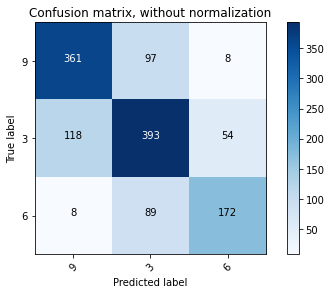

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, best_preds)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=set(df['quality']), title='Confusion matrix, without normalization')
plt.show()

**Observation:** The confusion matrix indicates the good model performance. The diagonal line going from top left to bottom right does 
contain the biggest numbers. Where the data falls away from the diagonal line (i.e., incorrect predictions), it still stays close to its group. This is why the edges, where the 
model predicted 3 and it actually was 9 or the model predicted 9 and it was actually 3, are very small. 

#5. Prediction using new data

Get means, min, and max of all quantitative features to the web application.

In [ ]:
fixed_acidity = np.mean(df['fixed acidity']) # 7.215307
print('fixed_acidity: %f' % fixed_acidity)
print(('fixed_acidity min: %f, max: %f') % (np.min(df['fixed acidity']), np.max(df['fixed acidity'])))
print('--')

volatile_acidity = np.mean(df['volatile acidity'])
print('volatile_acidity: %f' % volatile_acidity)
print(('volatile_acidity min: %f, max: %f') % (np.min(df['volatile acidity']), np.max(df['volatile acidity'])))
print('--')

citric_acid = np.mean(df['citric acid'])
print('citric_acid: %f' % citric_acid)
print(('citric_acid min: %f, max: %f') % (np.min(df['citric acid']), np.max(df['citric acid'])))
print('--')

residual_sugar = np.mean(df['residual sugar'])
print('residual_sugar: %f' % residual_sugar)
print(('residual_sugar min: %f, max: %f') % (np.min(df['residual sugar']), np.max(df['residual sugar'])))
print('--')

chlorides = np.mean(df['chlorides'])
print('chlorides: %f' % chlorides)
print(('chlorides min: %f, max: %f') % (np.min(df['chlorides']), np.max(df['chlorides'])))
print('--')

free_sulfur_dioxide = np.mean(df['free sulfur dioxide'])
print('free sulfur dioxide: %f' % free_sulfur_dioxide)
print(('free sulfur dioxide: %f, max: %f') % (np.min(df['free sulfur dioxide']), np.max(df['free sulfur dioxide'])))
print('--')

total_sulfur_dioxide = np.mean(df['total sulfur dioxide'])
print('total_sulfur_dioxide: %f' % total_sulfur_dioxide)
print(('total sulfur dioxide: %f, max: %f') % (np.min(df['total sulfur dioxide']), np.max(df['total sulfur dioxide'])))
print('--')

density = np.mean(df['density'])
print('density: %f' % density)
print(('density: %f, max: %f') % (np.min(df['density']), np.max(df['density'])))
print('--')

pH = np.mean(df['pH'])
print('pH: %f' % pH)
print(('pH: %f, max: %f') % (np.min(df['pH']), np.max(df['pH'])))
print('--')

sulphates = np.mean(df['sulphates'])
print('sulphates: %f' % sulphates)
print(('sulphates: %f, max: %f') % (np.min(df['sulphates']), np.max(df['sulphates'])))
print('--')

alcohol = np.mean(df['alcohol'])
print('alcohol: %f' % alcohol)
print(('alcohol: %f, max: %f') % (np.min(df['alcohol']), np.max(df['alcohol'])))
print('--')

color = np.mean(df['type'])
print('color: %i' % round(color))
print(('color: %f, max: %f') % (np.min(df['type']), np.max(df['type'])))
print('--')

color = 0

fixed_acidity: 7.215307
fixed_acidity min: 3.800000, max: 15.900000
--
volatile_acidity: 0.339666
volatile_acidity min: 0.080000, max: 1.580000
--
citric_acid: 0.318633
citric_acid min: 0.000000, max: 1.660000
--
residual_sugar: 5.443235
residual_sugar min: 0.600000, max: 65.800000
--
chlorides: 0.056034
chlorides min: 0.009000, max: 0.611000
--
free sulfur dioxide: 30.525319
free sulfur dioxide: 1.000000, max: 289.000000
--
total_sulfur_dioxide: 115.744574
total sulfur dioxide: 6.000000, max: 440.000000
--
density: 0.994697
density: 0.987110, max: 1.038980
--
pH: 3.218501
pH: 2.720000, max: 4.010000
--
sulphates: 0.531268
sulphates: 0.220000, max: 2.000000
--
alcohol: 10.491801
alcohol: 8.000000, max: 14.900000
--
color: 0
color: 0.000000, max: 1.000000
--


In [ ]:
# create data set of new data
x_test_tmp = pd.DataFrame([[fixed_acidity,
                                 volatile_acidity,
                                 citric_acid,
                                 residual_sugar,
                                 chlorides,
                                 free_sulfur_dioxide,
                                 total_sulfur_dioxide,
                                 density,
                                 pH,
                                 sulphates,
                                 alcohol,
                                 color]], columns = X_test.columns.values)

# predict quality based on incoming values
preds = gbm_model.predict_proba((x_test_tmp))

In [ ]:
list(df['quality'].cat.categories)[np.argmax(preds)]

6

In [ ]:
x_test_tmp

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,0


Credits:
- [Monetizing Machine Learning](https://github.com/Apress/monetizing-machine-learning)
- [HALIME DOĞAN](https://www.kaggle.com/code/halimedogan/red-wine-quality-prediction)
- [PANKAJ BHOWMIK](https://www.kaggle.com/code/pankajbhowmik/wine-quality-prediction-eda-xgboost) 